# 1.1 Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

from dateutil import parser

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

import matplotlib.dates as mdates

import warnings
warnings.filterwarnings('ignore')

# 1.2 Importing CSV FIle

In [2]:
df = pd.read_csv('goldstock.csv')
df.head()

,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


# 1.3 Removing Unnamed column:

In [3]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,Date,Close,Volume,Open,High,Low
0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2510 non-null   object 
 1   Close   2507 non-null   float64
 2   Volume  2511 non-null   float64
 3   Open    2511 non-null   float64
 4   High    2511 non-null   float64
 5   Low     2511 non-null   float64
dtypes: float64(5), object(1)
memory usage: 117.8+ KB


In [5]:
print(df.isnull().sum())
print("we found there are total 5 null values..Date(1) & CLose(4)")

Date      1
Close     4
Volume    0
Open      0
High      0
Low       0
dtype: int64
we found there are total 5 null values..Date(1) & CLose(4)


Removing null value in Date Column

In [6]:

df = df.dropna(subset=['Date'])
df.isnull().sum()

Date      0
Close     4
Volume    0
Open      0
High      0
Low       0
dtype: int64

In Close Column we fill the missing value with forward fill (ffill) + backword (bfill)

In [7]:
df['Close'] = df['Close'].ffill().bfill()
print(df.isnull().sum())
print("There is no null values, means the dataset is maintained or collected very well.")

Date      0
Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64
There is no null values, means the dataset is maintained or collected very well.


In [8]:
df.describe()

,Close,Volume,Open,High,Low
count,2510.000000,2510.000000,2510.000000,2510.000000,2510.000000
mean,1498.540797,185991.584861,1498.547769,1508.275020,1488.690518
std,298.748364,97614.643359,299.045106,301.192492,296.340368
min,1049.600000,1.000000,1051.500000,1062.700000,1045.400000
25%,1249.775000,126688.750000,1249.500000,1257.300000,1242.325000
50%,1332.750000,175471.000000,1334.000000,1342.350000,1326.600000
75%,1805.650000,234870.000000,1805.575000,1815.200000,1792.925000
max,2093.100000,787217.000000,2094.400000,2098.200000,2074.600000


# 1.4 Convert 'Date' column to datetime format

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Close,Volume,Open,High,Low
0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


# 1.5 Set 'Date' as the index

In [10]:
df.set_index('Date', inplace=True)
df.head()

,Close,Volume,Open,High,Low
Date,,,,,
2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


In [11]:
df['Return'] = df['Close'].pct_change()
volatility = df['Return'].std()
print("volatility : ", volatility)


volatility :  0.009325768008423807


Daily volatility under 1% is considered moderate and normal for gold.
gold price moves about 0.93% per day on average.
Gold is not extremely volatile


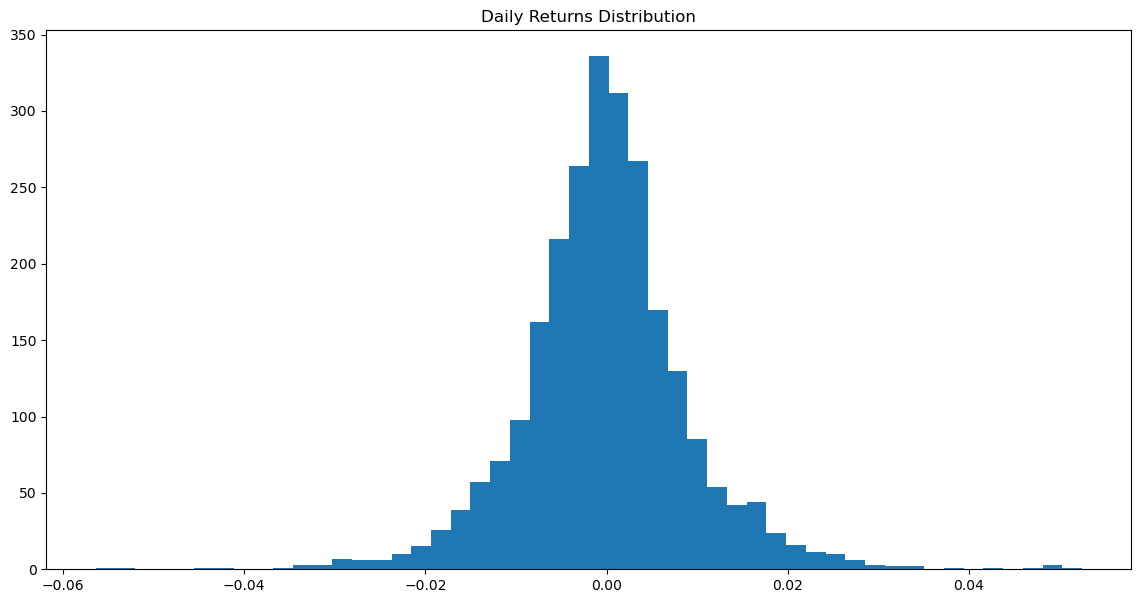

In [12]:
plt.figure(figsize=(14, 7))
plt.hist(df['Return'].dropna(), bins=50)
plt.title("Daily Returns Distribution")
plt.show()


In [13]:
corr=df[['Open','High','Low','Close','Volume']].corr()
corr

,Open,High,Low,Close,Volume
Open,1.000000,0.999458,0.999385,0.998990,0.027343
High,0.999458,1.000000,0.999251,0.999521,0.031200
Low,0.999385,0.999251,1.000000,0.999571,0.018608
Close,0.998990,0.999521,0.999571,1.000000,0.023211
Volume,0.027343,0.031200,0.018608,0.023211,1.000000


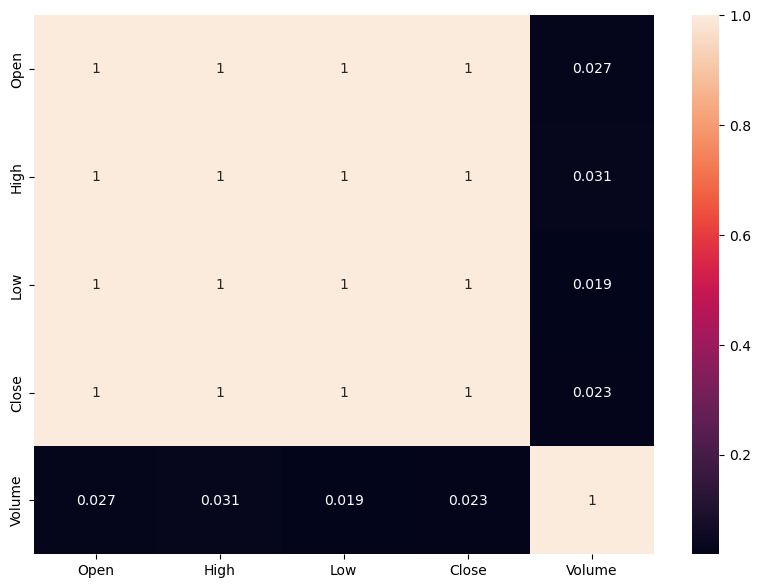

In [14]:
plt.figure(figsize=(10, 7))
import seaborn as sns
sns.heatmap(corr, annot=True)
plt.show()



 Perfect positive relationship (+1)      No relationship  (0)     Perfect negative relationship(-1)

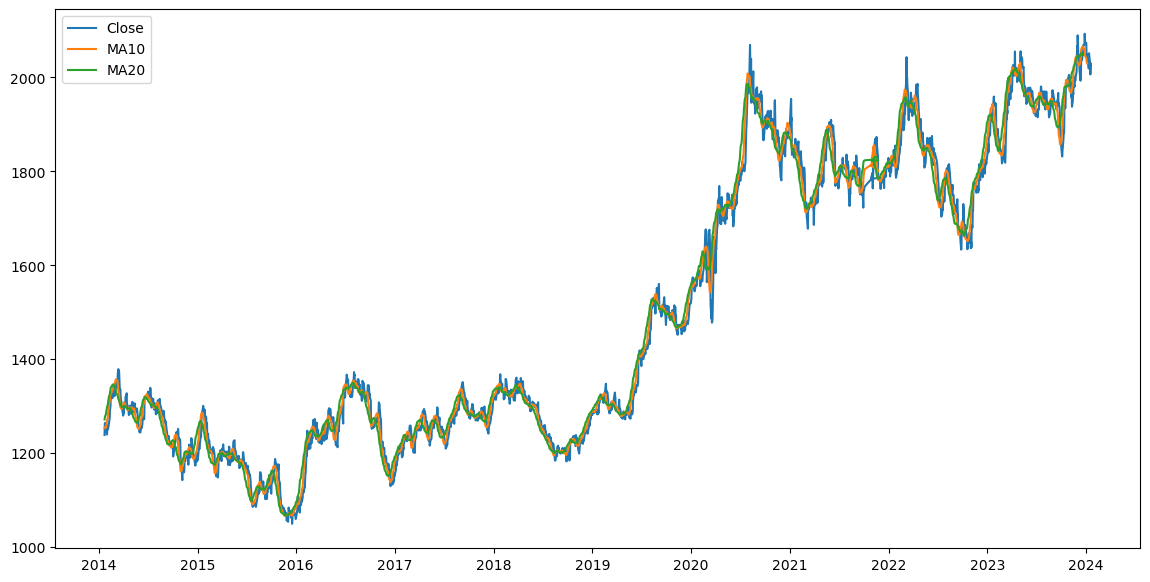

In [15]:
df['MA10'] = df['Close'].rolling(10).mean()  #This calculates the average closing price of the last 10 days.
df['MA20'] = df['Close'].rolling(20).mean()
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label="Close")
plt.plot(df['MA10'], label="MA10")
plt.plot(df['MA20'], label="MA20")
plt.legend()
plt.show()



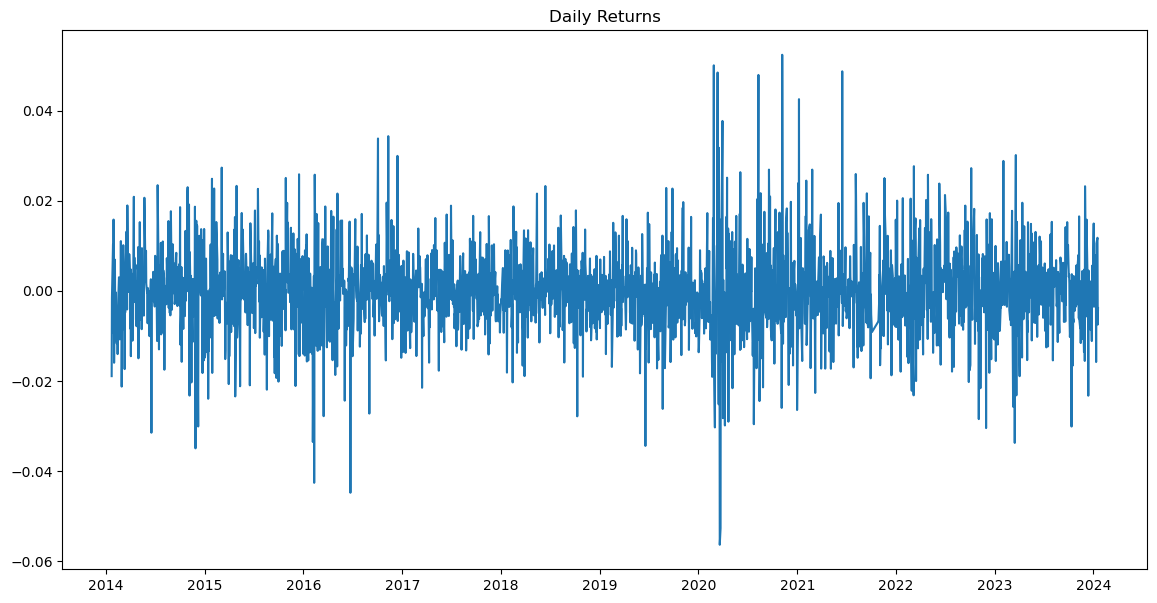

In [16]:
plt.figure(figsize=(14, 7))
plt.plot(df['Return'])
plt.title("Daily Returns")
plt.show()


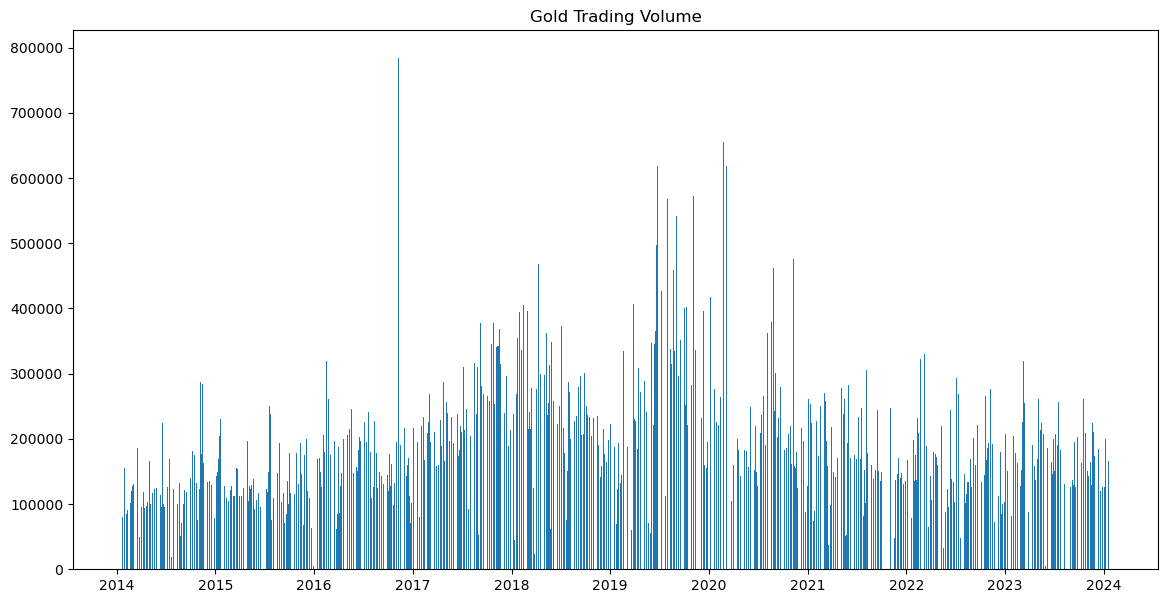

In [17]:
plt.figure(figsize=(14, 7))
plt.bar(df.index, df['Volume'])
plt.title("Gold Trading Volume")
plt.show()


In [18]:
from scipy.stats import kurtosis, skew
sk = skew(df['Close'])
print("Skewness:", sk)




Skewness: 0.39668965249739296


In [19]:
# 0 → perfectly symmetric

# Positive (>0) → right-skewed (long tail on the right)

# Negative (<0) → left-skewed (long tail on the left)

                          #skewness = +0.40
# The gold price distribution has a slightly longer tail on the right
#  Occasional high-price spikes
#  More big upward moves than downward moves
#  Normal behavior for long-term gold trends (gold slowly increases over years)

In [20]:
kurt = kurtosis(df['Close'])
print("Kurtosis:", kurt)

Kurtosis: -1.437788621475058


In [21]:
    # 0 = Mesokurtic   normal distribution

    # Positive (>0) = (Leptokurtic)   heavy tails (more extreme values)

    # Negative (<0) = (Platykurtic)    light tails (fewer extreme values)
    
                      # kurtosis = −1.44
#  The gold price distribution has lighter tails
#  Fewer extreme jumps
#  Price is relatively stable and smooth
#  Gold does not have many “spikes” or “crashes” in this period

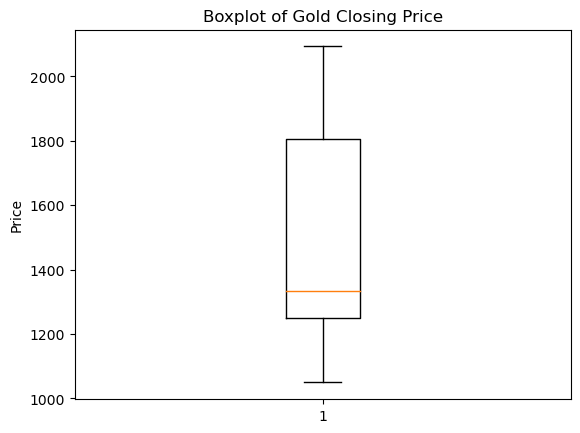

In [22]:
plt.boxplot(df['Close'])
plt.title("Boxplot of Gold Closing Price")
plt.ylabel("Price")
plt.show()


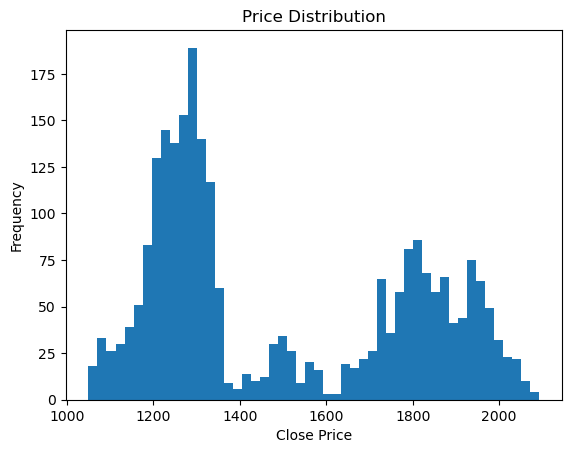

In [23]:
plt.hist(df['Close'], bins=50)
plt.title("Price Distribution")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.show()


# 1.6 Plotting the Closing Price:

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


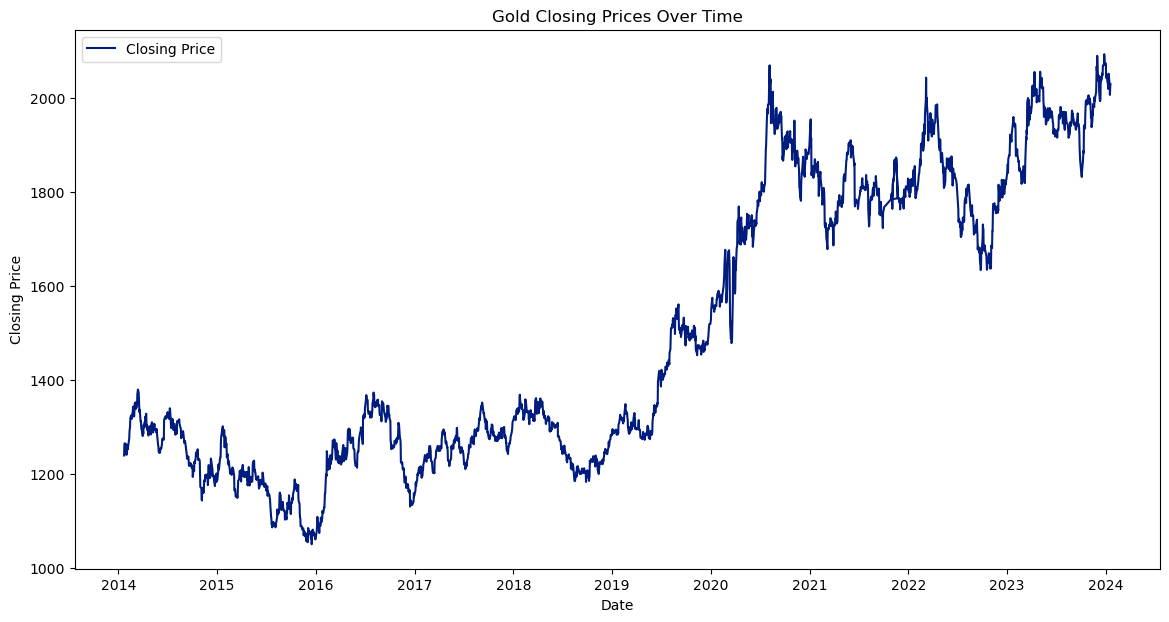

In [24]:
# Checking available styles
print(plt.style.available)

plt.style.use('seaborn-v0_8-dark-palette')
plt.figure(figsize=(14, 7))

plt.plot(df['Close'], label='Closing Price')  #line plot
plt.title('Gold Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

## Insight from Plot:

The chart illustrates the overall increasing trend in gold prices over the past decade, with significant volatility in recent years. This trend could be influenced by various economic factors, including market demand, global economic conditions, and geopolitical events.

# 1.7 Seasonal Decomposition:

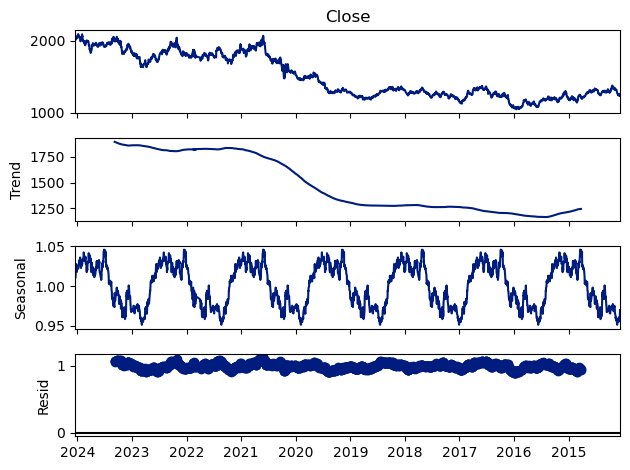

In [25]:
decomposition = seasonal_decompose(df['Close'], model='multiplicative', period=365)
decomposition.plot()
plt.show()

## Insight from Plot:

Downward Trend: The long-term trend of gold prices is downward, with a significant decline followed by a slight recovery towards the end of the period. Seasonal Pattern: There is a clear seasonal pattern in gold prices, with regular fluctuations occurring annually. Effective Decomposition: The residuals are well-behaved, suggesting that the decomposition model has effectively captured the trend and seasonal components.

In [26]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df.Close.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -1.7176309643865035
p-value: 0.422052131101218


In [27]:
from statsmodels.graphics.tsaplots import plot_acf

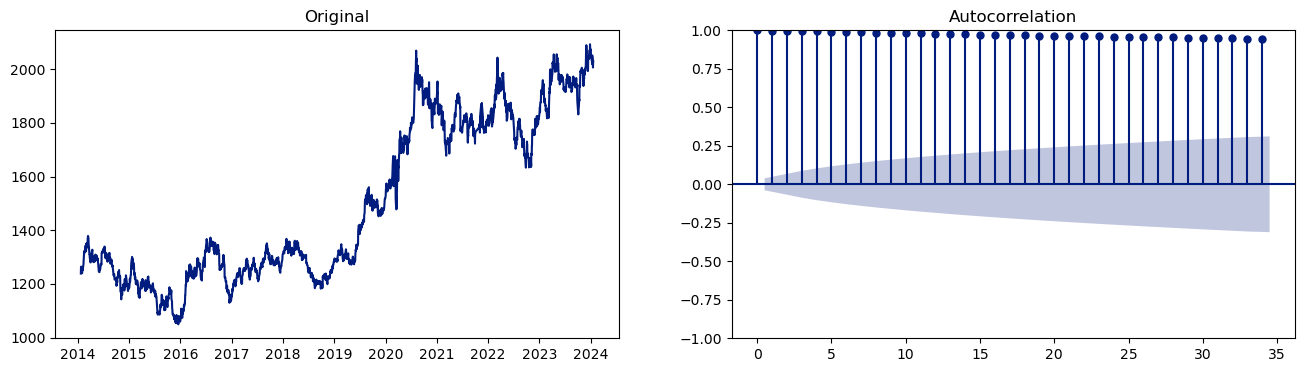

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(df.Close)
ax1.set_title("Original")

plot_acf(df.Close, ax=ax2);

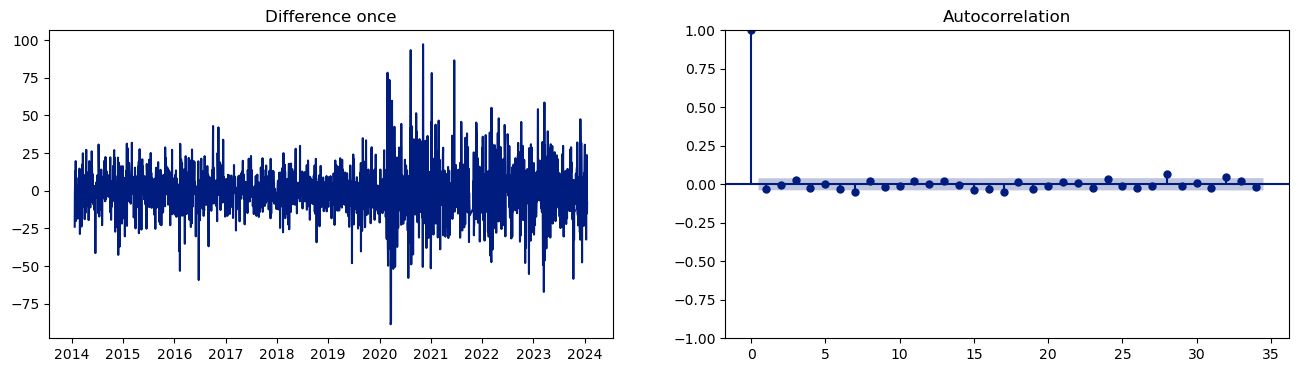

In [29]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once")

plot_acf(diff, ax=ax2);

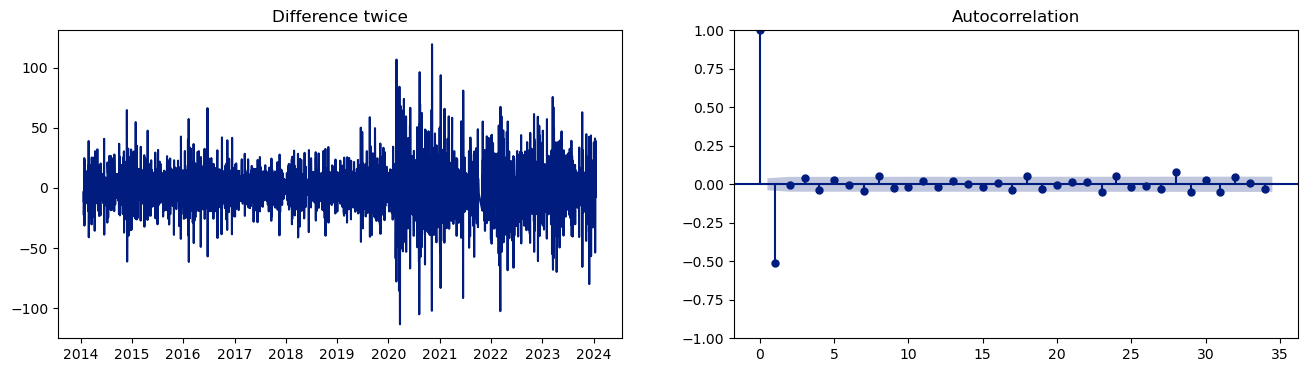

In [30]:
diff = df.Close.diff().diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference twice")

plot_acf(diff, ax=ax2);

We can use the pmdarima package to get the number of differencing.

p

In [31]:
from statsmodels.graphics.tsaplots import plot_pacf

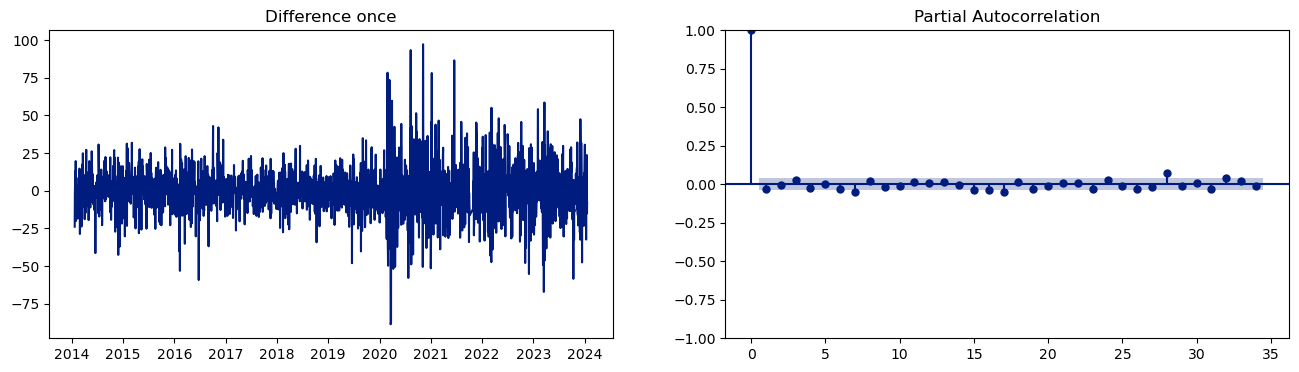

In [32]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)

plot_pacf(diff, ax=ax2);

q

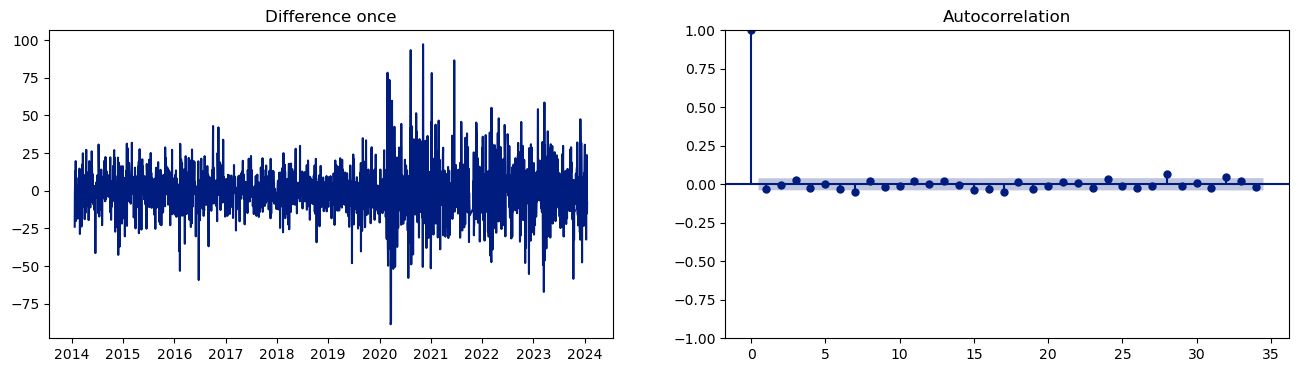

In [33]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)

plot_acf(diff, ax=ax2);

# 2.1 ARIMA Model for Forecasting:

In [34]:
#df = df.sort_values(date).reset_index(drop=True)

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

df = df.sort_index()
# Split the data into train and test sets
train = df['Close'][:int(0.8 * len(df))]
test = df['Close'][int(0.8 * len(df)):]

# 2.2 Fit ARIMA model

In [35]:
model = ARIMA(train, order=(0, 1, 0))
model_fit = model.fit()

# 2.3 Forecast

In [36]:
n_steps = len(test)
forecast_res = model_fit.get_forecast(steps=n_steps)
forecast = forecast_res.predicted_mean
forecast.index = test.index 

# 2.4 Plot the results

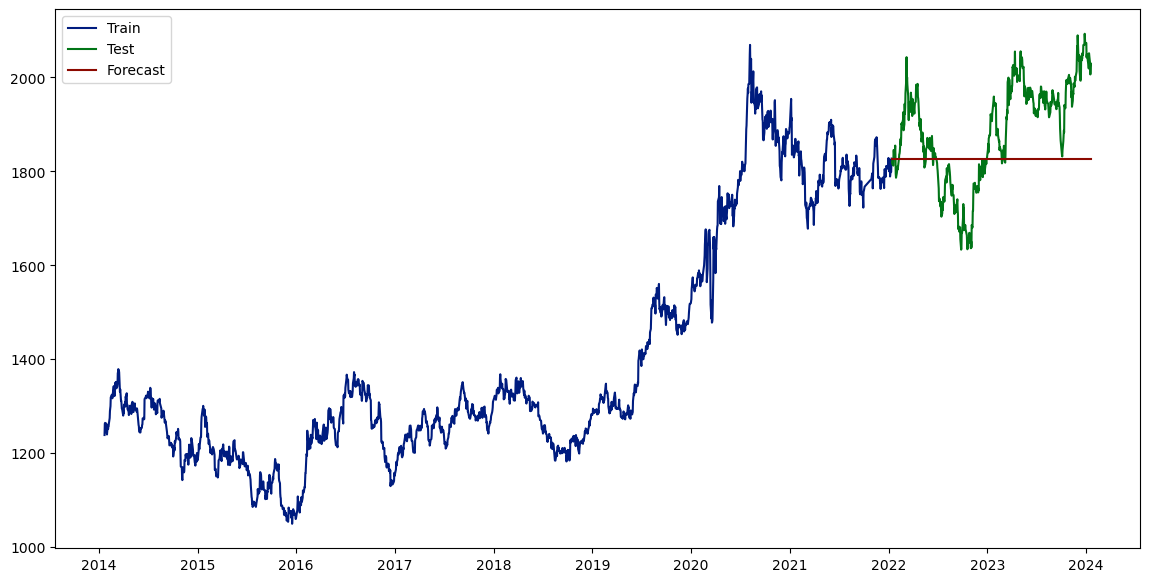

In [37]:
plt.figure(figsize=(14, 7))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()

## Insight from Plot:

The plot illustrates the use of historical gold prices for model training and testing, with a brief forecast provided. This approach helps in understanding how well the model can predict future gold prices based on past trends.

# 2.5 Evaluate the model

In [38]:
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'RMSE: {rmse}')

RMSE: 122.35678521621195


In [39]:
error=rmse/df['Close'].mean() * 100
print("Error is : {:.2f}%".format(error))


Error is : 8.17%


In [40]:
accuracy = 100 - error

print(f"Accuracy of ARIMA model : {accuracy:.2f}%")


Accuracy of ARIMA model : 91.83%


Random Forest regressor

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [42]:
df['Close_Lag1'] = df['Close'].shift(1)
df['Close_Lag2'] = df['Close'].shift(2)
df['Close_Lag3'] = df['Close'].shift(3)

df = df.dropna()

In [43]:
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]

X_train = train[['Close_Lag1', 'Close_Lag2', 'Close_Lag3']]
y_train = train['Close']

X_test = test[['Close_Lag1', 'Close_Lag2', 'Close_Lag3']]
y_test = test['Close']


In [44]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

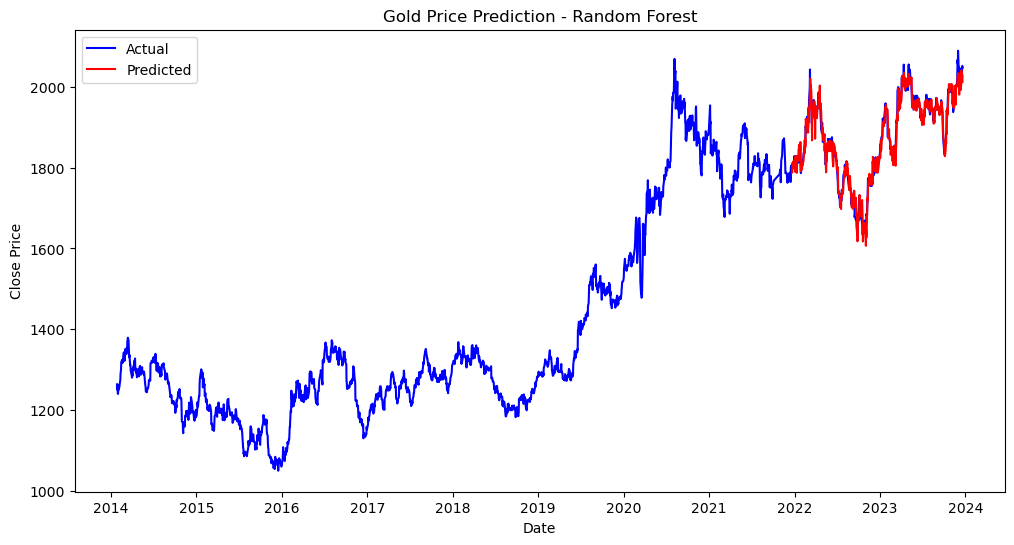

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label='Actual', color='blue')
plt.plot(test.index, y_pred, label='Predicted', color='red')
plt.title('Gold Price Prediction - Random Forest')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [46]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

error_percent = rmse / y_test.mean() * 100
print(f'Error: {error_percent:.2f}%')
print(f'Accuracy: {100 - error_percent:.2f}%')


RMSE: 20.380593903599983
Error: 1.09%
Accuracy: 98.91%
